# Advanced Axis configuration

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Table of contents

[1. Set color background to the plots](#bg)<br>
[2. Scales](#scale)<br>
[3. Limits](#limits)
- [x_lim](#xl)
- [y_lim](#yl)<br>

[4. ticks](#ticks)
- [Locators and Formatters](#locform)
    - [Customize tick labels](#cust)
    - [Rotation](#rot)
    - [ticks frequency](#freq)<br>
    - [Tick's label format](#tformat)
    - [Tick's label range](#trange)

[5. Share axis](#share)
- [Before plotting](#before)
- [After plotting](#after)<br>

[6. Super labels](#labels)<br>

[7. Spines](#spines)
- [Color](#color_spines)
- [Linewidth](#linewidth_spines)
- [Visible](#visible_spines)
- [Position](#position)<br>

[8. Horizontal & Vertical lines](#h&v)<br>

[9. Text](#text)
- [Annotations](#ann)<br>

[10. TeX equations](#tex)

[11. Color](#color)

## <a id = 'bg'> Set color background to the plot </a>
You can achieve this with `ax.set_facecolor('color')`.

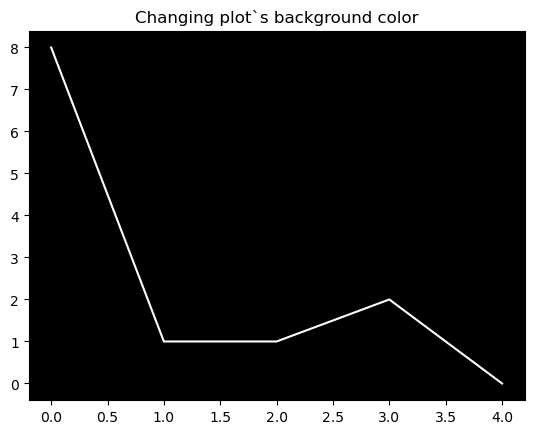

In [3]:
x = np.arange(0,5)
y  = np.random.randint(10, size = len(x))

fig = plt.figure
fig, ax = plt.subplots()

ax.plot(x,y, color = 'w')
ax.set_title('Changing plot`s background color')
ax.set_facecolor('k')

## <a id = 'scale'> Scales </a>

Until now, we have worked with linear scales in both $x$ and $y$ axis. But we may want to plot a graph in a logarithmic scale.
- For example, dB (decibels) are presented in multiples of 10 (0, 10, 20, 30, ...). This scale is, in reality, a logarithmic scale.

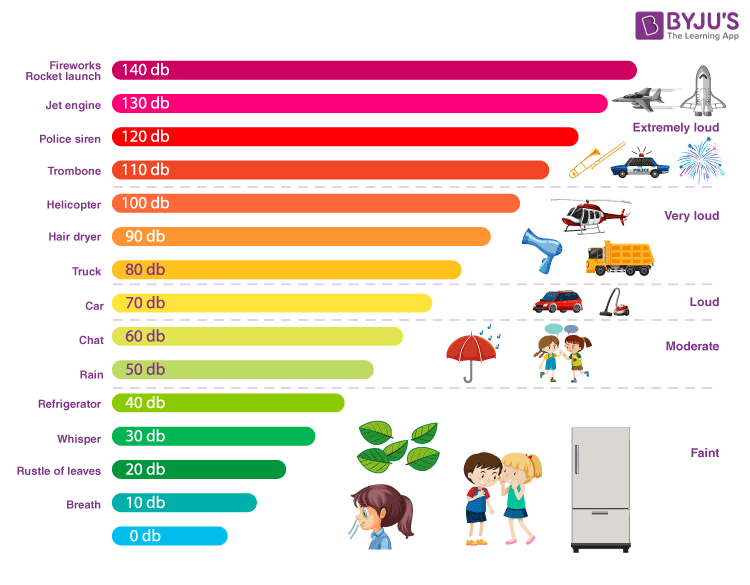

This, if we apply basic combinatory, leads us to have 4 possible options:
1. x_axis and y_axis with linear scale. **-> (default)**
2. x_axis and y axis with logarithmic scale. **-> (loglog)**
3. x_axis with linear scale and y_axis with logarithmic scale. **-> (semilogy)**
4. x_axis with logarithmic scale and y_axis with liner scale. **-> (semilogx)**

Text(0.5, 1.0, 'loglog(x, y)')

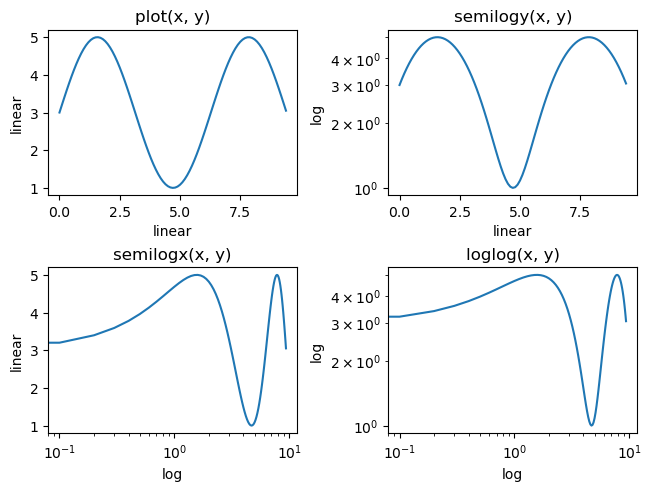

In [4]:
fig, axs = plt.subplot_mosaic([['linear', 'linear-log'],
                               ['log-linear', 'log-log']], layout='constrained')

x = np.arange(0, 3*np.pi, 0.1)
y = 2 * np.sin(x) + 3

ax = axs['linear']
ax.plot(x, y) # default declaration
ax.set_xlabel('linear')
ax.set_ylabel('linear')
ax.set_title('plot(x, y)')

ax = axs['linear-log']
ax.semilogy(x, y) # semilogy declaration (instead of plot)
ax.set_xlabel('linear')
ax.set_ylabel('log')
ax.set_title('semilogy(x, y)')

ax = axs['log-linear']
ax.semilogx(x, y) # semilogx declaration (instead of plot)
ax.set_xlabel('log')
ax.set_ylabel('linear')
ax.set_title('semilogx(x, y)')

ax = axs['log-log']
ax.loglog(x, y) # loglog declaration (instead of plot)
ax.set_xlabel('log')
ax.set_ylabel('log')
ax.set_title('loglog(x, y)')

## <a id = 'limits'> Limits </a>
You can set a limit to the $x$ and $y$ axis to show only part of the graph. This can be done with `xlim()` and `ylim()`.

>**Note**: The examples are going to be plotted in a implicit way (see notebook 1. Two ways to create graphs). If we wanted to set limit in the explicit way, we would type `ax.set_xlim(xmin, xmax)` (or `ax.set_ylim(ymin, ymax)`).

#### <a id = 'xl'> x_lim </a>
Let's say we have a function, `cos(x)`, and the interval $[-2\pi, 2\pi]$.

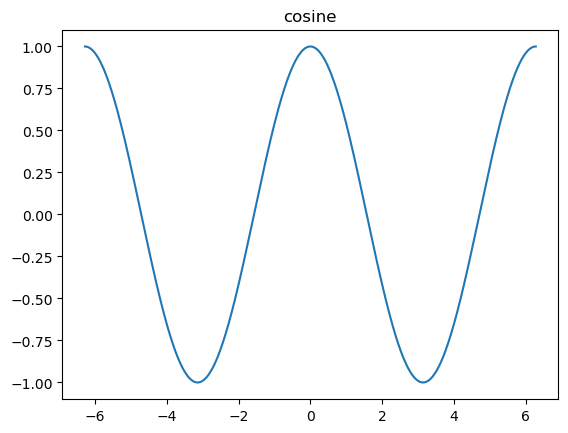

In [5]:
x = np.linspace(-2*np.pi, 2*np.pi, 10000)
y = np.cos(x)

plt.title('cosine')
plt.plot(x,y)

plt.show()

Now, since it is a periodic function, imagine that we wanted to plot only one period of the function, i.e. the interval $[-\pi, \pi]$.

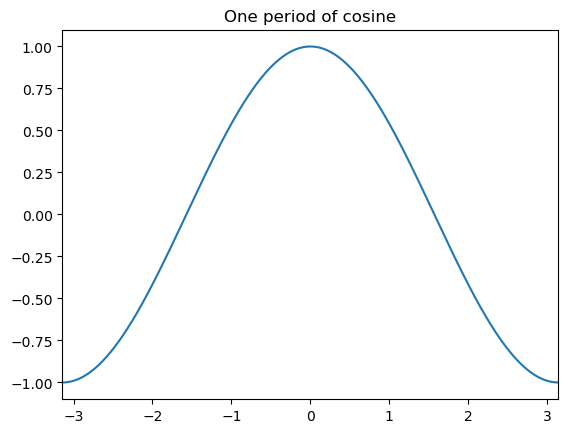

In [6]:
plt.title('One period of cosine')
plt.xlim(-np.pi, np.pi)
plt.plot(x,y)

plt.show()

#### <a id = 'yl'> y_lim </a>
Did you know that politicians are able to manipulate us with statistics? And they do this very often and  most people don't even realize they are being tricked. Let's see an example of how they trick us.

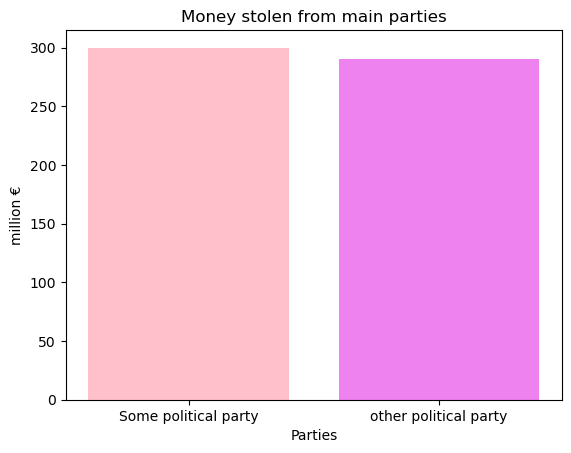

In [7]:
# Suppose we have the next graph
x = ['Some political party', 'other political party']
# made up data
corrupcy = np.array([300.0, 290.0]) #money in millions of euros
color = ['pink', 'violet']
plt.title('Money stolen from main parties')
plt.ylabel('million €')
plt.xlabel('Parties')
plt.bar(x, corrupcy, color= color)

plt.show()

Okay, if we saw this graph, we would think that both parties have stolen roughly the same amount of money, right?
Check out the next graph, **which contains the same data**.

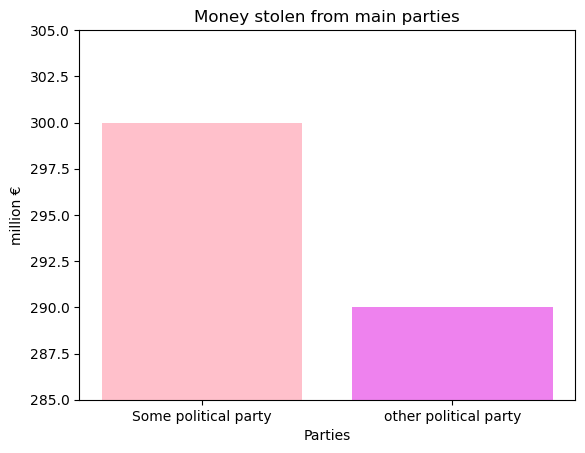

In [8]:
plt.title('Money stolen from main parties')
plt.ylabel('million €')
plt.xlabel('Parties')
plt.ylim(285, 305)
plt.bar(x, corrupcy, color= color)

plt.show()

Now it doesn't seem that both parties have stolen the same amount of money right?
- It seems that the first one has stolen roughly x3 times more than the second party!! And that is not true as we saw in $1^{st}$ plot

## <a id = 'ticks'> ticks </a>
Ticks are the text shown in the $x$ and $y$ axis. `xticks` using **plt.** or `set_xticks` using **ax.** allows you to modify and personalize this text shown in the axis. 

### <a id = 'locform'> Locators and formatters </a>
Pay attention to the code and to the output. Read the comments. Notice that you need to `import matlplotlib.ticker`.

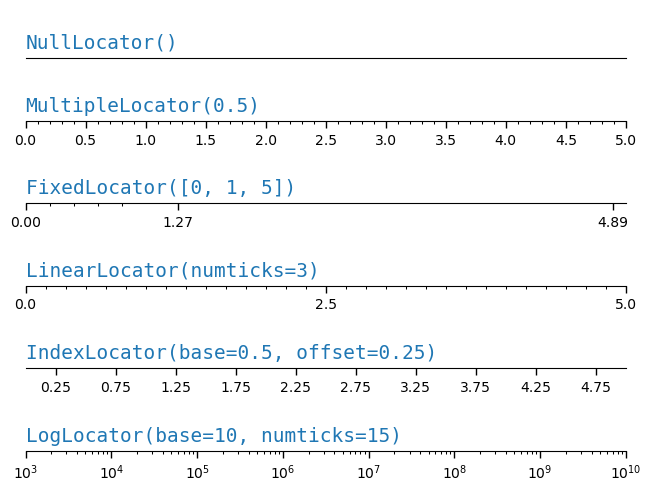

In [22]:
import matplotlib.ticker as ticker

def setup(ax, title):
    """Set up common parameters for the Axes in the example."""
    # only show the bottom spine
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.spines[['left', 'right', 'top']].set_visible(False)

    ax.xaxis.set_ticks_position('bottom')
    
    # major and minor ticks general configuration
    ax.tick_params(which='major', width=1.00, length=5)
    ax.tick_params(which='minor', width=0.75, length=2.5)
    
    # axis limits
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 1)
    
    #title
    ax.text(0.0, 0.2, title, transform=ax.transAxes,
            fontsize=14, fontname='Monospace', color='tab:blue')


fig, axs = plt.subplots(6, 1, layout='constrained')

# Null Locator
setup(axs[0], title="NullLocator()")
axs[0].xaxis.set_major_locator(ticker.NullLocator())
axs[0].xaxis.set_minor_locator(ticker.NullLocator())

# Multiple Locator
setup(axs[1], title="MultipleLocator(0.5)")
axs[1].xaxis.set_major_locator(ticker.MultipleLocator(0.5))
axs[1].xaxis.set_minor_locator(ticker.MultipleLocator(0.1))

# Fixed Locator
setup(axs[2], title="FixedLocator([0, 1, 5])")
axs[2].xaxis.set_major_locator(ticker.FixedLocator([0, 1.27, 4.89]))
axs[2].xaxis.set_minor_locator(ticker.FixedLocator(np.linspace(0.2, 0.8, 4)))

# Linear Locator
setup(axs[3], title="LinearLocator(numticks=3)")
axs[3].xaxis.set_major_locator(ticker.LinearLocator(3))
axs[3].xaxis.set_minor_locator(ticker.LinearLocator(31))

# Index Locator
setup(axs[4], title="IndexLocator(base=0.5, offset=0.25)")
axs[4].plot(range(0, 5), [0]*5, color='white')
axs[4].xaxis.set_major_locator(ticker.IndexLocator(base=0.5, offset=0.25))

# Log Locator
setup(axs[5], title="LogLocator(base=10, numticks=15)")
axs[5].set_xlim(10**3, 10**10)
axs[5].set_xscale('log')
axs[5].xaxis.set_major_locator(ticker.LogLocator(base=10, numticks=15))


plt.show()

#### <a id = 'cust'> Customize ticks labels</a>
To customize the labels in the `xticks` is easy but not trivial (at least for me). `xticks` has 3 main parameters: **ticks** (location), **labels** (the text you want to set as xticks) and rotation. If we have our `xticks`' desired labels stored in a list called `labels`, and we want them with a vertical rotation (as an example) we might think to code:
```python
labels = ['Juan', 'Maria', 'Pedro', 'Marta']
ax.set_xticks(labels = labels, rotation = 'vertical')
```

But this is **wrong**. We need to  pass the **LOCATION** (i.e. *ticks parameter*) first to indicate matplotlib **WHERE** we want these new labels. This *ticks* parameter is only a `np.arange(0, len(labels))` value. In the examples below, you'll see that this *ticks parameter* is passed with the variable $x$ and not with `np.arange(0, len(labels))`. But this is just because in this case, our variable $x$ is already a `np.arange()`. If we had done it  the way I'm about to code below, it'd have been just fine.

```python
# correct way
labels = ['Juan', 'Maria', 'Pedro', 'Marta']
ax.set_xticks(ticks = np.arange(0, len(labels)), labels = labels, rotation = 'vertical')
```

Let's see some examples customizing our **xticks labelst

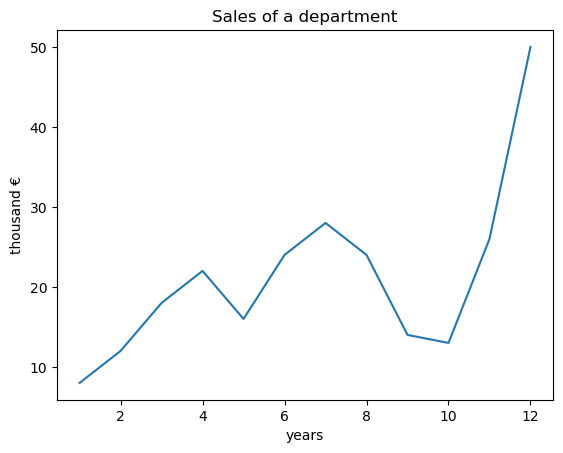

In [9]:
x = np.arange(1,13)
y = np.array([8,12,18,22,16,24,28,24,14,13,26,50])

plt.title('Sales of a department')
plt.xlabel('years')
plt.ylabel('thousand €')
plt.plot(x,y)

plt.show()

And, you want to show the actual years, not numbers (from year  2010 to 2022). You can modify the ticks of the x_axis with `xticks()`.

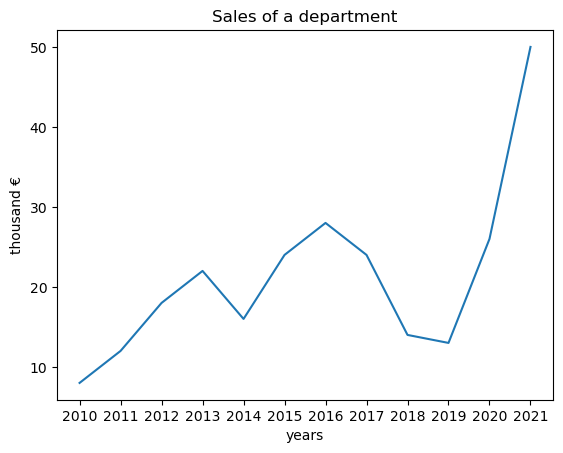

In [10]:
years = np.arange(2010, 2022)
plt.title('Sales of a department')
plt.xlabel('years')
plt.ylabel('thousand €')
plt.xticks(ticks = x, labels = years)
plt.plot(x,y)

plt.show()

#### <a id = 'rot'> Rotation </a>
Now, imagine, that we had two departments: marketing and HHRR departments

Text(0.5, 0.98, 'Total sales')

<Figure size 640x480 with 0 Axes>

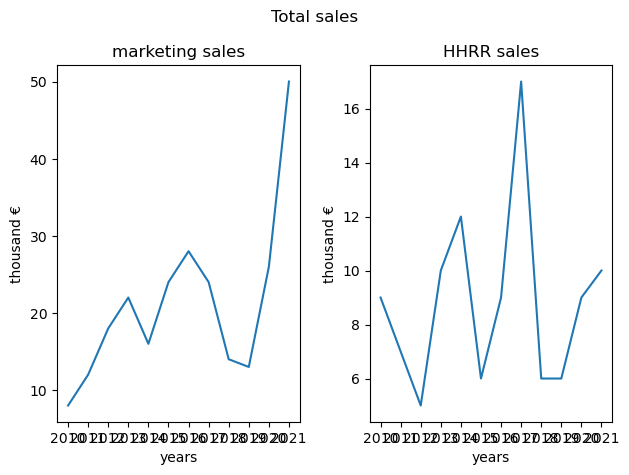

In [15]:
marketing_sales = y
hhrr_sales = np.array([9,7,5,10,12,6,9,17,6,6,9,10])
fig = plt.figure()
fig, ax = plt.subplots(nrows = 1, ncols = 2, layout = 'tight')
ax[0].set_title('marketing sales')
ax[0].set_ylabel('thousand €')
ax[0].set_xlabel('years')
ax[0].set_xticks(x, labels = years)
ax[0].plot(x, marketing_sales)

ax[1].set_title('HHRR sales')
ax[1].set_ylabel('thousand €')
ax[1].set_xlabel('years')
ax[1].plot(x, hhrr_sales)
ax[1].sharex(ax[0])

fig.suptitle('Total sales')

We can see that the x_axis is illegible. To fix this, we can take advantage of the `rotation` attribute that we can pass to `set_xticks`.

Text(0.5, 0.98, 'Total sales')

<Figure size 640x480 with 0 Axes>

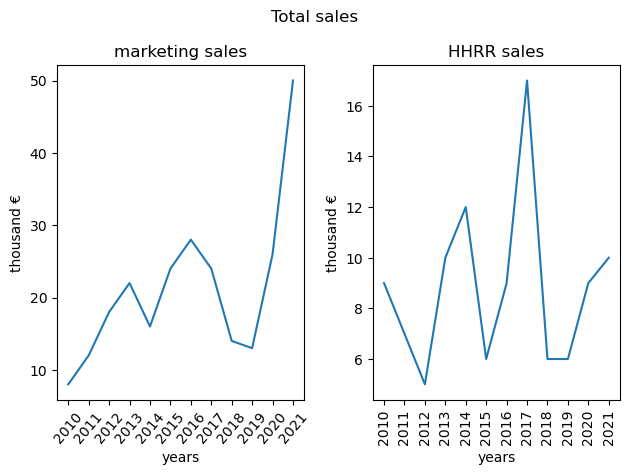

In [16]:
fig = plt.figure()
fig, ax = plt.subplots(nrows = 1, ncols = 2, layout = 'tight')
ax[0].set_title('marketing sales')
ax[0].set_ylabel('thousand €')
ax[0].set_xlabel('years')
ax[0].set_xticks(x, years, rotation = 50) # rotation angle
ax[0].plot(x, marketing_sales)

ax[1].set_title('HHRR sales')
ax[1].set_ylabel('thousand €')
ax[1].set_xlabel('years')
ax[1].set_xticks(x, years, rotation = 90) # rotation angle
ax[1].plot(x, hhrr_sales)


fig.suptitle('Total sales')

Choose whichever you like the most.

#### <a id = 'freq'> Ticks frequency </a>
If you take a look at the graph from above, you'll notice that not all the **y_ticks** are plotted. There is a constant frequency: 10 on the left, 1 on the right. If we wanted modify this frequency, we could do it.

Text(0.5, 0.98, 'Total sales')

<Figure size 640x480 with 0 Axes>

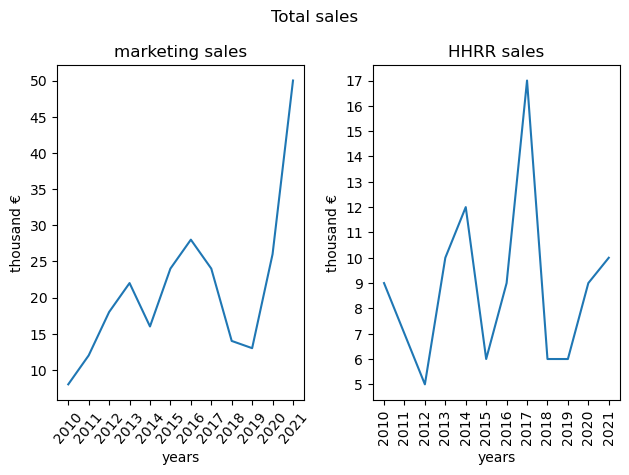

In [17]:
fig = plt.figure()
fig, ax = plt.subplots(nrows = 1, ncols = 2, layout = 'tight')
ax[0].set_title('marketing sales')
ax[0].set_ylabel('thousand €')
ax[0].set_xlabel('years')
ax[0].set_xticks(x, years, rotation = 50) # rotation angle
ax[0].set_yticks(ticks = np.arange(10, max(marketing_sales)+1, 5.0)) #min tick, max tick, frequency
ax[0].plot(x, marketing_sales)

ax[1].set_title('HHRR sales')
ax[1].set_ylabel('thousand €')
ax[1].set_xlabel('years')
ax[1].set_xticks(x, years, rotation = 90)# rotation angle
ax[1].set_yticks(ticks = np.arange(min(hhrr_sales), max(hhrr_sales)+1, 1.0)) #min tick, max tick, frequency

ax[1].plot(x, hhrr_sales)


fig.suptitle('Total sales')

#### <a id = 'tformat'> Tick's label format </a>
Matplotlib has its own tick label format. For example, if numbers on the axis are too long, it will display them in scientific notation. You can change this with `ticklabel_format(style = <style>)`. Let's see a quick example to get the gist of it.

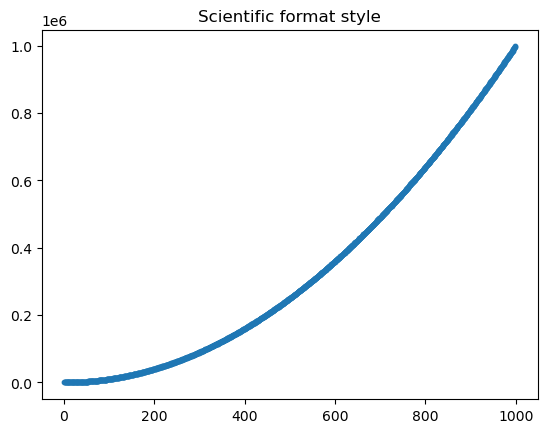

In [9]:
x_values = range(1, 1000)
y_values = [x**2 for x in x_values]

fig, ax = plt.subplots()
ax.scatter(x_values, y_values, s = 10)
ax.set_title("Scientific format style")

plt.show()

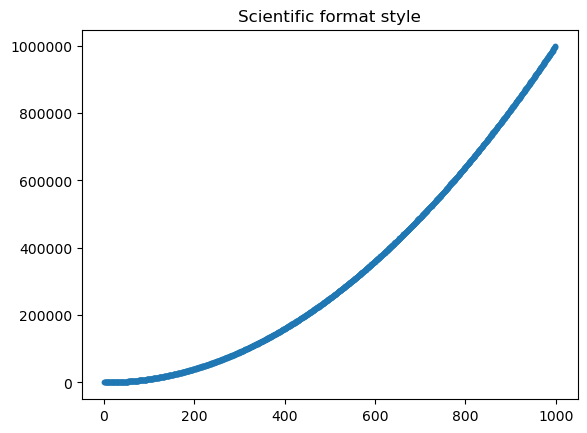

In [10]:
x_values = range(1, 1000)
y_values = [x**2 for x in x_values]

fig, ax = plt.subplots()
ax.scatter(x_values, y_values, s = 10)

ax.ticklabel_format(style = 'plain')
ax.set_title("Scientific format style")

plt.show()

#### <a id = "trange"> Tick's label range </a>
You can also specify the range of both xticks and yticks that you want to plot. This can be done with the function `ax.axis([x_start, x_end, y_start, y_end])`.

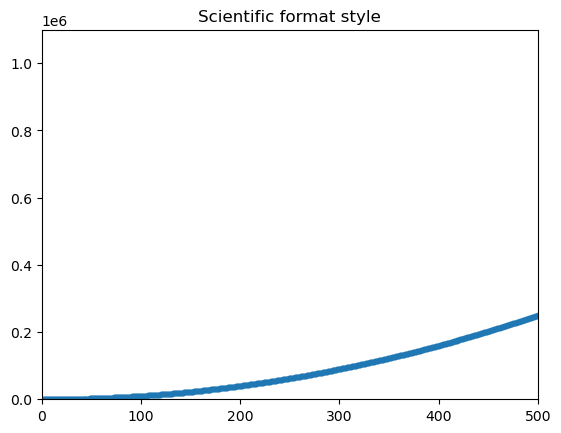

In [7]:
fig, ax = plt.subplots()
ax.scatter(x_values, y_values, s = 10)

ax.axis([0, 500, 0, 1_100_000])
ax.set_title("Scientific format style")

plt.show()

#### <a id = "minorticks"> Minor ticks </a>
Last but not least, we have the minor ticks

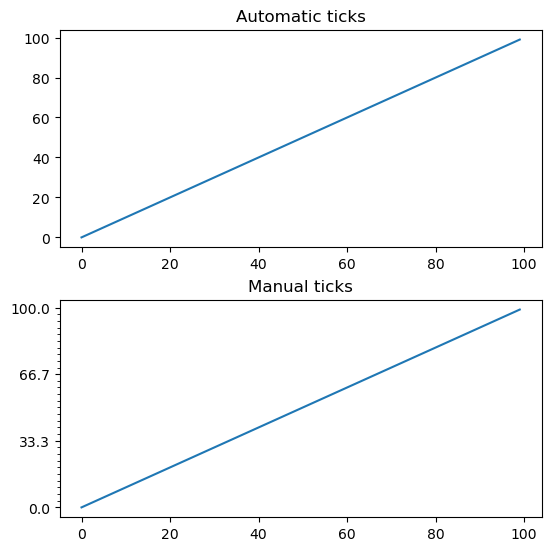

In [32]:
fig, axs = plt.subplots(2, 1, figsize=(5.4, 5.4), layout='constrained')
x = np.arange(100)
for nn, ax in enumerate(axs):
    ax.plot(x, x)
    if nn == 0:
        ax.set_title('Automatic ticks')
    else:
        ax.set_title('Manual ticks')
        ax.set_yticks(np.arange(0, 100.1, 100/3))
        ax.set_yticks(np.arange(0, 100.1, 100/30), minor=True)

## <a id = 'share'>Share Axis</a>
We can share either *x_axis* or *y_axis* among plots. This can be done with `sharex` and `sharey`.

>**Note**: Since both work in the same way, we are only going to see examples with **sharex**.

We can set this property before or after plotting. Even though it works (almost) in the same way, the declaration is different.

#### <a id = 'before'> Before plotting </a>

Text(0.5, 0.98, 'Share axis before plotting')

<Figure size 640x480 with 0 Axes>

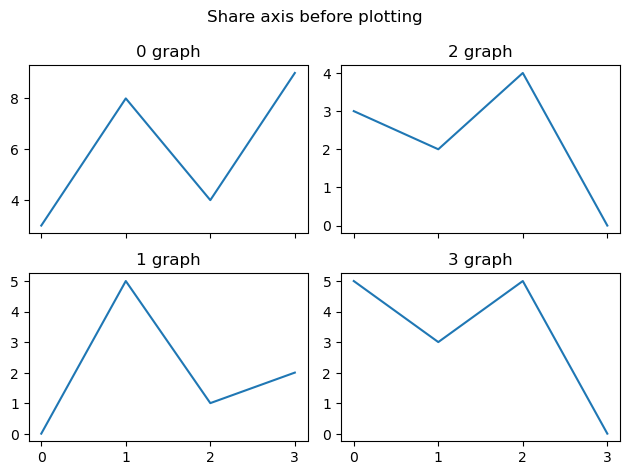

In [22]:
# OO-style

def random_data():
    y = np.random.randint(10, size = 4)
    return y

x = np.arange(0, 4)

fig = plt.figure()
fig, ax = plt.subplots(nrows = 2, ncols = 2, layout = 'tight', sharex = True)

for row in range(ax.shape[0]):
    for col in range(ax.shape[1]):
        ax[row, col].set_title(f'{row + 2*col} graph')
        ax[row,col].plot(x, random_data())

fig.suptitle('Share axis before plotting')

#### <a id = 'after'> After plotting </a>

Text(0.5, 0.98, 'Share axis after plotting')

<Figure size 640x480 with 0 Axes>

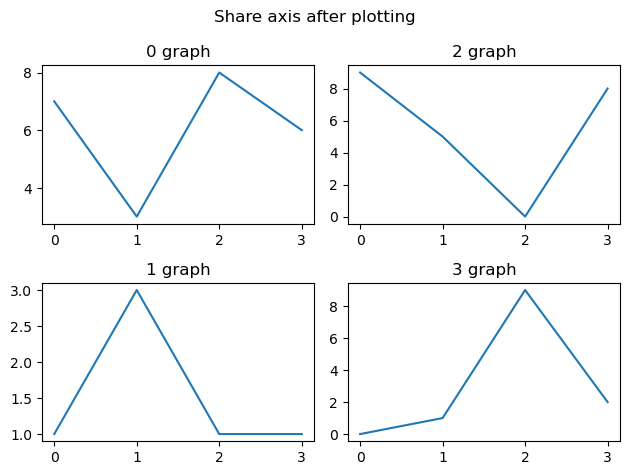

In [23]:
fig = plt.figure()
fig, ax = plt.subplots(nrows = 2, ncols = 2, layout = 'tight')

for row in range(ax.shape[0]):
    for col in range(ax.shape[1]):
        ax[row, col].set_title(f'{row + 2*col} graph')
        ax[row, col].plot(x, random_data())
        if row != 0 and col != 0:
            ax[row, col].sharex(ax[0,0])

fig.suptitle('Share axis after plotting')

>**Note**: Notice that there is a **slight difference** between sharing axis before and after plotting. After plotting, **all** graphs mantain the *x_ticks* whereas in before plotting, only those graphs in the **last row** mantain the  *x_ticks*.

## <a id = 'labels'> Super labels </a>
When plotting subplots, that they all share the same data in the $x$ and $y$ axis, you might want to consider having only one label for the *x_axis* and only one label for *y_axis*. 

Text(0.5, 0.98, 'Subplots without superlabels')

<Figure size 640x480 with 0 Axes>

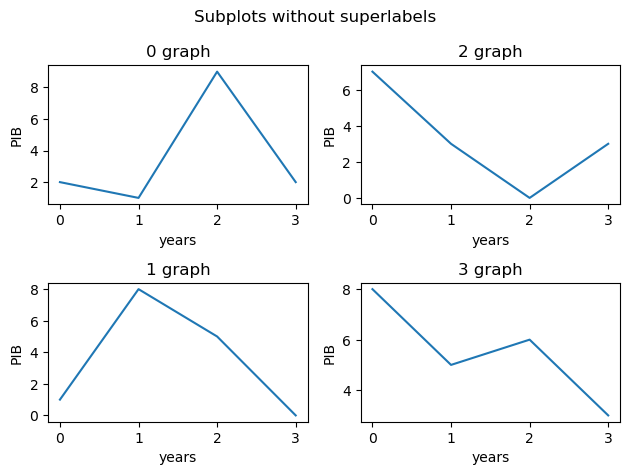

In [24]:
# without superlabels
fig = plt.figure()
fig, ax = plt.subplots(nrows = 2, ncols = 2, layout = 'tight')

for row in range(ax.shape[0]):
    for col in range(ax.shape[1]):
        ax[row, col].set_title(f'{row + 2*col} graph')
        ax[row, col].set_xlabel('years')
        ax[row, col].set_ylabel('PIB')
        ax[row, col].plot(x, random_data())
        
        if row != 0 and col != 0:
            ax[row, col].sharex(ax[0,0])

fig.suptitle('Subplots without superlabels')

To avoid this redundancy:

Text(0.5, 0.98, 'Subplots with superlabels')

<Figure size 640x480 with 0 Axes>

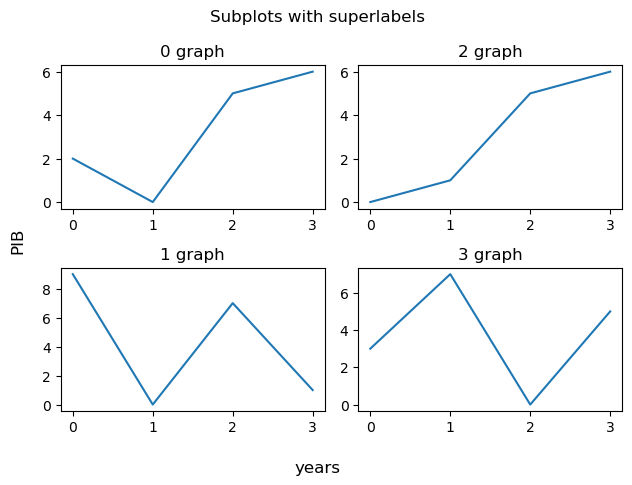

In [25]:
# with super labels
fig = plt.figure()
fig, ax = plt.subplots(nrows = 2, ncols = 2, layout = 'tight')

for row in range(ax.shape[0]):
    for col in range(ax.shape[1]):
        ax[row, col].set_title(f'{row + 2*col} graph')
        ax[row, col].plot(x, random_data())
        
        if row != 0 and col != 0:
            ax[row, col].sharex(ax[0,0])

fig.supxlabel('years')
fig.supylabel('PIB')
fig.suptitle('Subplots with superlabels')

## <a id = 'spines'> Spines </a>
So the spines are like the borders of the plot. The rectangle that englobes the graph. With that said, we can tell that there are 4 spines:
- bottom
- top
- right
- left


We can modify these spines in many different ways. Let's see the most basic ones:
- visible
- color
- linewidth
- position

>**Note**: As far as I know, it only works with OO-style plotting,  i.e. with an **axis object** 
(with plt, you have the **box** attribute which affects all spines).

#### <a id ='color_spines'> Color </a>

<Figure size 640x480 with 0 Axes>

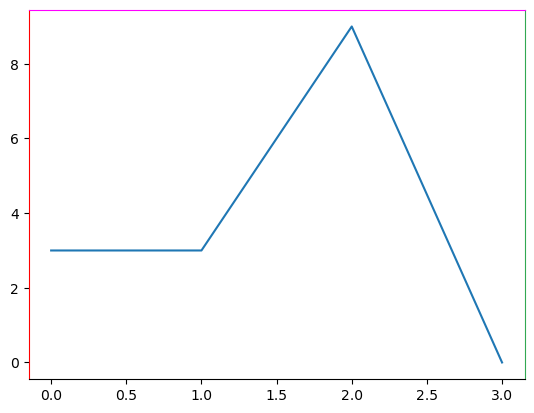

In [26]:
fig = plt.figure()
fig, ax = plt.subplots()

ax.spines['left'].set_color('r')
ax.spines.top.set_color('fuchsia')
ax.spines.right.set_color('#32a852')
ax.spines['bottom'].set_color('k')

ax.plot(x, random_data())

#### <a id = 'visible_spines'> Visible </a>

<Figure size 640x480 with 0 Axes>

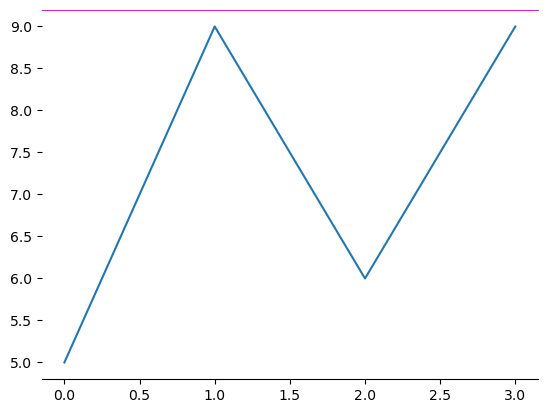

In [27]:
fig = plt.figure()
fig, ax = plt.subplots()

ax.spines.left.set_visible(False)
ax.spines.top.set_color('fuchsia')
ax.spines.right.set_color('#32a852')
ax.spines['right'].set_visible(False)


ax.plot(x, random_data())

#### <a id = 'linewidth_spines'> Linewidth </a>

<Figure size 640x480 with 0 Axes>

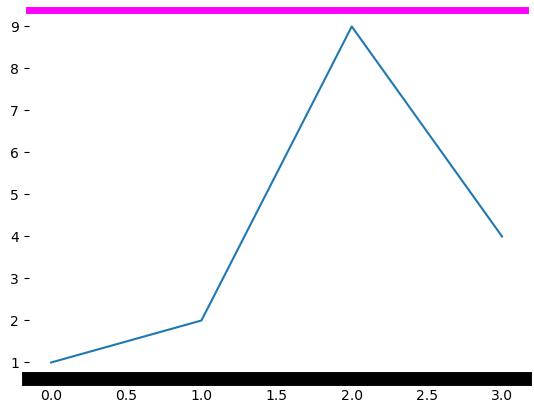

In [28]:
fig = plt.figure()
fig, ax = plt.subplots()

ax.spines.left.set_visible(False)
ax.spines.top.set_color('fuchsia')
ax.spines.right.set_color('#32a852')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(10)


ax.plot(x, random_data())

#### <a id = 'position'> Position </a>
Click [here](https://matplotlib.org/stable/api/spines_api.html#matplotlib.spines.Spine.set_position) to understand better the following code.

Text(0.5, 0.98, 'Positions')

<Figure size 640x480 with 0 Axes>

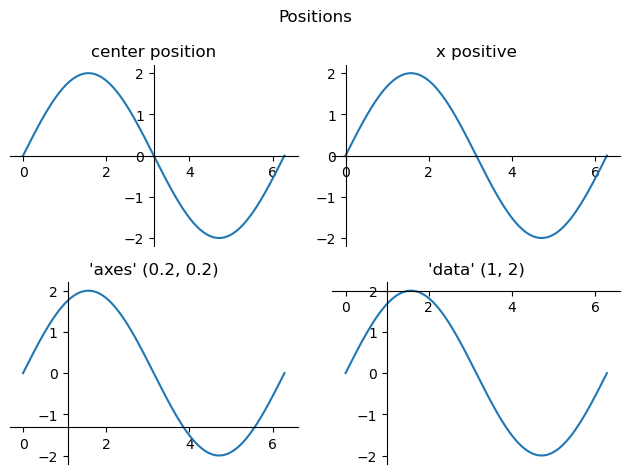

In [29]:
x = np.linspace(0, 2*np.pi, 10000)
y = 2* np.sin(x)

fig = plt.figure()
fig, ax = plt.subplots(nrows = 2, ncols = 2, layout = 'tight')

ax[0,0].set_title('center position')
ax[0,0].spines[['left', 'bottom']].set_position('center')
ax[0,0].spines[['top', 'right']].set_visible(False)
ax[0,0].plot(x, y)

ax[0,1].set_title("x positive")
ax[0,1].spines[['left', 'bottom']].set_position('zero')
ax[0,1].spines[['top', 'right']].set_visible(False)
ax[0,1].plot(x, y)

ax[1,0].set_title("'axes' (0.2, 0.2)")
ax[1,0].spines.left.set_position(('axes', 0.2))
ax[1,0].spines.bottom.set_position(('axes', 0.2))
ax[1,0].spines[['top', 'right']].set_visible(False)
ax[1,0].plot(x, y)

ax[1,1].set_title("'data' (1, 2)")
ax[1,1].plot(x, y)
ax[1,1].spines.left.set_position(('data', 1))
ax[1,1].spines.bottom.set_position(('data', 2))
ax[1,1].spines[['top', 'right']].set_visible(False)

fig.suptitle('Positions')

## <a id = 'h&v'> Horizontal, Vertical and Diagonal lines </a>

This can be useful to set thresholds, define specific areas of a function, draw an artificial *x_axis*, etc.

These functions are: 
- `axhline` for horizontal lines
- `axvline` for vertical lines.
- `axline` for diagonal lines


> **Note**: It has the same sintax for **pyplot-style** and **OO-style**.

In [ ]:
fig, ax = plt.subplots()

# Plot some data
ax.plot(x, y)

# Plot a horizontal line at y=0.6
ax.axhline(y=0.6, color='navy', lw=0.5, ls=':')

# Optionally set labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_title('Plot with horizontal line')

# Show the plot
plt.show()

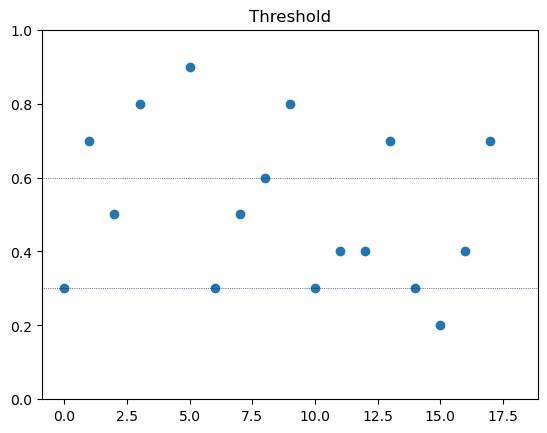

In [30]:
# Threshold between y = 0.3 and y =0.6

y = np.array([3,7,5,8,12,9,3,5,6,8,3,4,4,7,3,2,4,7,75])*0.1
x = np.arange(0,len(y))

plt.title('Threshold')
plt.scatter(x,y)
plt.ylim(0,1)
plt.axhline(y = 0.3,  color = 'navy', lw = 0.5, ls = ':') # threshold y = 0.3
plt.axhline(y = 0.6, color = 'navy', lw = 0.5, ls = ':') # threshold y = 0.6


plt.show()

<Figure size 640x480 with 0 Axes>

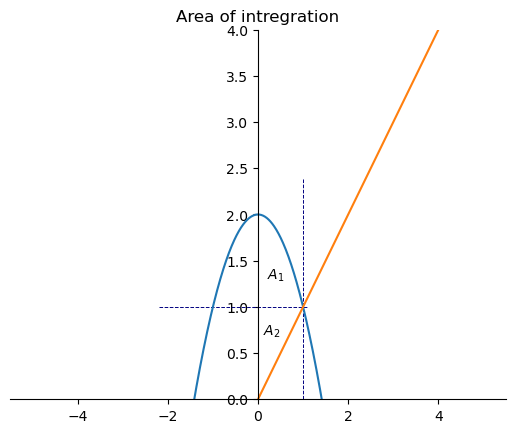

In [31]:
# Define specific area to integrate
#Let's suppose they give us a function and we want to calculate some area (x > 0, y > 0,
# and the area that contains the point (0.5,1)). To calculate this area, we must split it in two.
x = np.linspace(-5, 5, 1000)
func1 = -x**2 + 2
func2 = x

fig = plt.figure()
fig, ax = plt.subplots()

ax.set_title('Area of intregration')
ax.spines[['bottom', 'left']].set_position('zero')
ax.spines[['top', 'right']].set_visible(False)
ax.set_ylim(0,4)
ax.axhline(y = 1, xmin= 0.3, xmax = 0.6,  color = 'navy', 
           lw = 0.7, ls = '--' ) #written the same way as in .plt()
ax.axvline(x = 1, ymax = 0.6,  color = 'navy', lw = 0.7, ls = '--' )
ax.text(0.2, 1.3, r'$A_1$', style = 'oblique') # LaTeX equation seen later
ax.text(0.1, 0.7, r'$A_2$', style = 'oblique') # LateX equation seen later
ax.plot(x,func1)
ax.plot(x, func2)

plt.show()

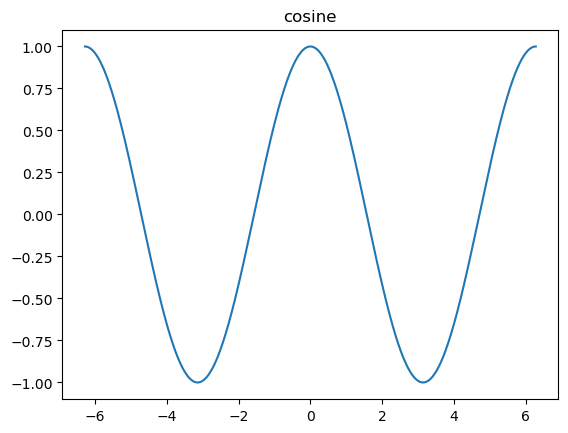

In [32]:
# artificial x_axis
# Let's say we plot the cosine function
x = np.linspace(-2*np.pi, 2*np.pi, 10000)
y = np.cos(x)

plt.title('cosine')
plt.plot(x,y)

plt.show()

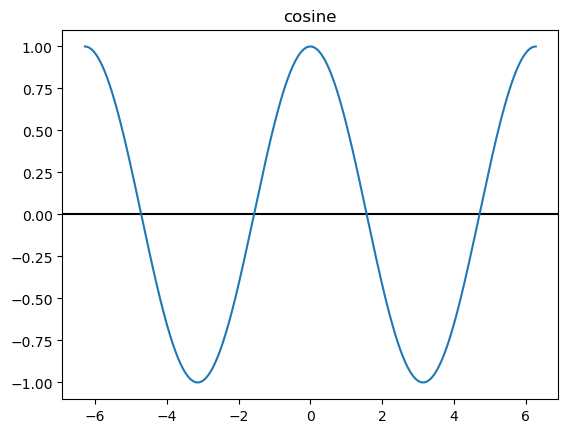

In [33]:
# Let's introduce an artificial x_axis to see better the periods of the function, or the points the function
# crosses the x axis

plt.title('cosine')
plt.axhline(y = 0, color = 'k', ls = '-' )
plt.plot(x,y)

plt.show()

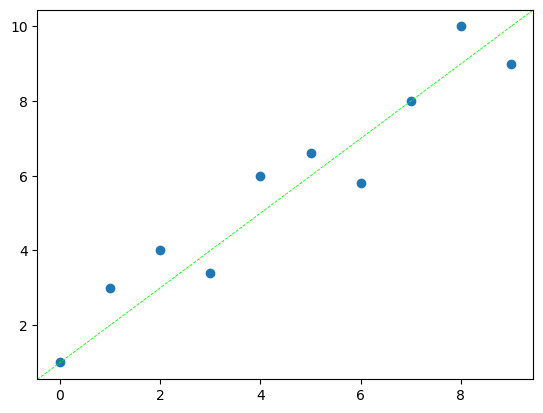

In [34]:
x = np.arange(0,10)
y = np.array([1,3,4,3.4,6,6.6,5.8,8,10,9])

plt.axline((0,1), slope = 1, lw = 0.6, color = 'Lime', ls = '--')
plt.scatter(x, y )

## <a id = 'text'> Text </a>
We can place texts in our plots. The function `text()` has many parameters. The most important one are:
- **x, y** coordenates indicating the starting point of the text. They are the first arguments that are passed.
- **s**: string with the desired text to be written in our plot.
- **style**: italic (cursiva), normal or oblique (negrita).
- **bbox**: The text written will be encapsulated in a box. It receives a **dictionary** with the box info (bg, pad,...)
- **color**: text color
- **font-family and font-size**
- **rotation**: float, vertical or horizontal (the same we saw with [ticks](#rot))
- **visible**: bool (might be useful to use it with a conditional)

<Figure size 640x480 with 0 Axes>

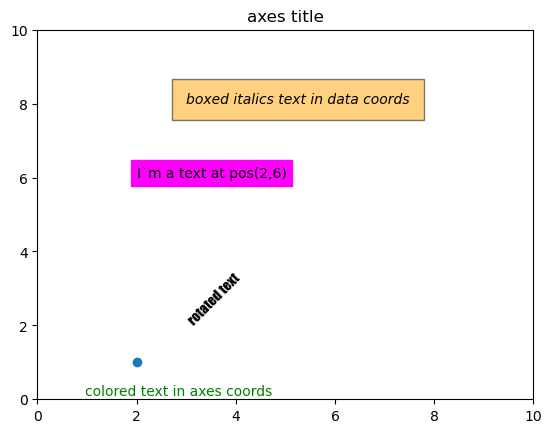

In [35]:
fig = plt.figure()
fig, ax = plt.subplots()


ax.set_title('axes title')
ax.axis([0,10,0,10])

ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor': 'orange', 'alpha': 0.5, 'pad': 10})

ax.text(2, 6, 'I`m a text at pos(2,6)', fontsize=10, backgroundcolor = 'fuchsia')

ax.text(3, 2, 'rotated text',rotation = 45, fontfamily = 'fantasy')

ax.text(0.95, 0.1, 'colored text in axes coords',
        color='green', fontsize=10)

# plotting a point
ax.plot([2], [1], 'o')

Another extra attributes that I haven't mentioned yet, are those to align texts in case we had multiple texts and we wanted them to be aligned. In order to do so you have the following attributes:
- **hoizontalalignment** (ha)
- **verticalalignment** (va)
- **transform** (usually used with the two attributes recently mentioned.

The use of `transform=ax.transAxes` throughout the code **indicates** that the coordinates are given **relative to the axes** bounding box, with **(0, 0) being the lower left** of the axes and **(1, 1) the upper right**.

- This is very useful because it allows us to not depend one the width or heigth of each plot. What I mean by this is that a plot with y coordenates (height) that go from 0 to 5000 is not the same as another one with ycoordenates from 0 to 10. Placing text by absolute coordinates might be a pain on the neck sometimes. If you don't want to care what height or width values our plot is going to have, use relative coordenates with `transform=ax.transAxes`. This way the coordenate (0.5, 0.5) is going to be the center no matter the height nor width we have in our plot.


- In other words, it gives position **constistency** among plots.

Text(0.95, 0.01, 'colored text in axes coords')

<Figure size 640x480 with 0 Axes>

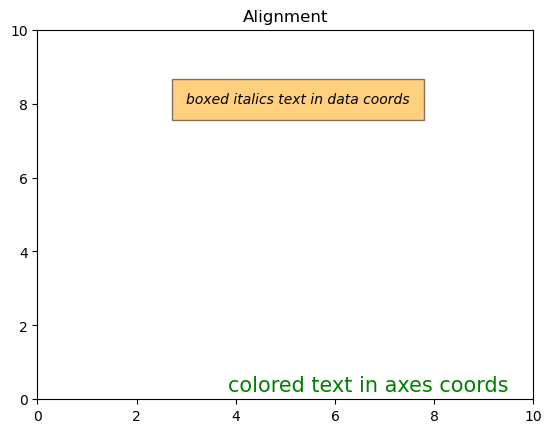

In [36]:
fig = plt.figure()
fig, ax = plt.subplots()

ax.set_title('Alignment')
ax.axis([0,10,0,10])

ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor': 'orange', 'alpha': 0.5, 'pad': 10})

# same text as before but with alignment
ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)

Two text's attributes that we might see in people's code are `ha`and `va` both equal to `center` (usually). They are the same as `horizontalalignment` and `verticalalignment` respectively.

Their defualt values are `ha = 'left` and `va = 'baseline` meaning that the x,y coordenates that you pass are the starting $x$ coordinate of the text (`ha = 'left`) and going to be written on top of an invisible line at the $y$ coordenate (`va = 'baseline'`).

<br>

<div>
    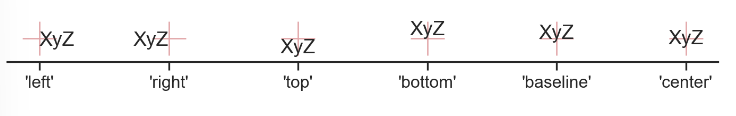
</div>

<br>

We are going to see an example where the functionality of these attributes is going to be clearly explained.

- In the next example, we are going to plot a histogram bar and mark with a `axvline` the mean of that distribution. Then we want to place some text on top of this line and we are going to see `ha` and `va` functionality to perfection.


[]

<Figure size 640x480 with 0 Axes>

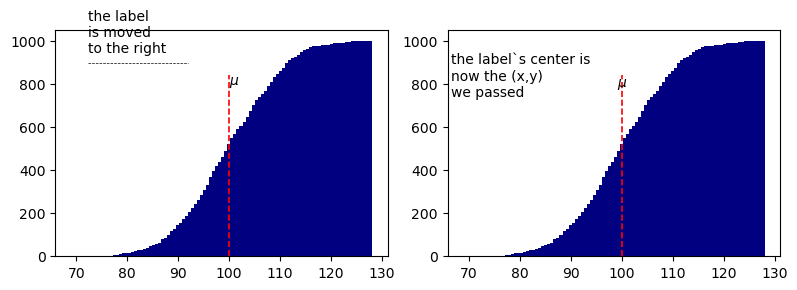

In [37]:
# creating generator of a normal distribution with some mean and std
generator = np.random.default_rng()

mean = 100
std = 9
data = generator.normal(loc = mean, scale = std, size = (1000))
num_bins = 100

fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(1, 2, tight_layout = True, figsize = (8,3))

#without ha and va attributes
ax1.hist(data, num_bins, color = 'navy', cumulative = True)
ax1.axvline(mean, ymax = 0.8, color = 'r', lw = 1.2, ls = '--')
ax1.text(mean, 0.8 * len(data), r'$\mu$')
#invisible line of va = baseline <----------------------------------------------------------
ax1.axhline(0.9*len(data), xmin = 0.1 , xmax = 0.4, lw = 0.5, ls = '--', color = 'k') 
ax1.text(0.1, 0.9,'the label\nis moved\nto the right',transform=ax1.transAxes)

#with ha and va attributes
ax2.hist(data, num_bins, color = 'navy', cumulative = True)
ax2.axvline(mean, ymax = 0.8, color = 'r', lw = 1.2, ls = '--')
ax2.text(mean, 0.8 * len(data), r'$\mu$', ha = 'center', va = 'center')
ax2.text(0.01, 0.9,'the label`s center is \nnow the (x,y)\nwe passed',
         transform=ax2.transAxes, va = 'top', ha = 'left')

plt.plot()

Of course, the label is not placed perfectly, but now it is much easier to apply the changes it needs.

Text(0.05, 0.9, 'Now the label\nis placed\nperfectly! :)')

<Figure size 640x480 with 0 Axes>

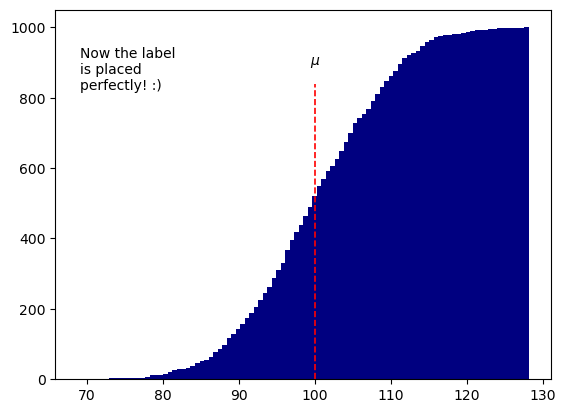

In [38]:
fig = plt.figure()
fig, ax = plt.subplots()
ax.hist(data, num_bins, color = 'navy', cumulative = True)
ax.axvline(mean, ymax = 0.8, color = 'r', lw = 1.2, ls = '--')
ax.text(mean, 0.9 * len(data), r'$\mu$', ha = 'center', va = 'center')
ax.text(0.05, 0.9, 'Now the label\nis placed\nperfectly! :)', va = 'top',
        transform = ax.transAxes)

#### <a id = 'ann'> Annotations </a>
Annotations are graphical elements, often pieces of text, that explain, add context to, or otherwise highlight some portion of the visualized data.

In an annotation, there are two points to consider: the **location of the data being annotated (xy)** and the **location of the annotation text (xytext)**. Both of these arguments are (x, y) tuples:


<Figure size 640x480 with 0 Axes>

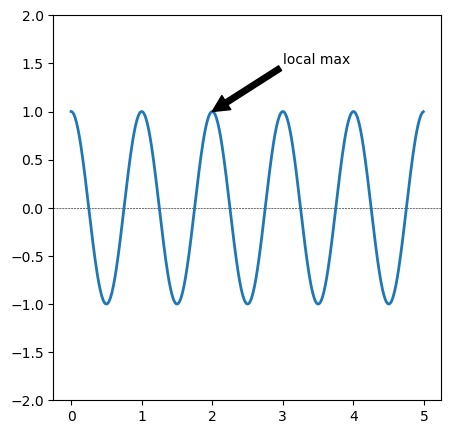

In [41]:
x = np.arange(0.0, 5.0, 0.01)
y = np.cos(2*np.pi*x)  # Calculate y for the entire x array

fig = plt.figure()
fig, ax = plt.subplots(figsize=(5, 5))

ax.axhline(y=0, lw=0.4, color='k', ls='--')
ax.set_ylim(-2, 2)

ax.annotate('local max', xy=(2, 1),  # data being annotated (x,y)
            xytext=(3, 1.5),  # annotation text (x,y)
            arrowprops=dict(facecolor='black'))

ax.plot(x, y, lw=2)

plt.show()

The attribute `arrowprops` we see above has some parameters that might be of our interest

##### Arrow's style
This can be easily personalized with the attribute `arrowstyle`.

<Figure size 640x480 with 0 Axes>

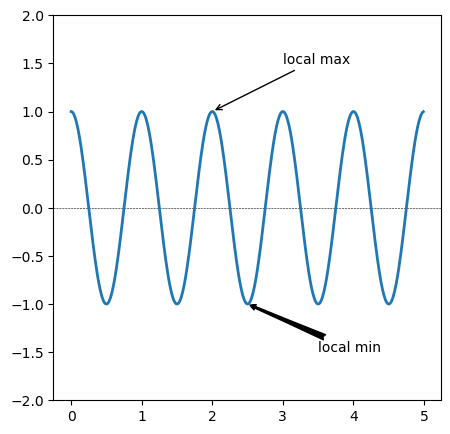

In [42]:
fig = plt.figure()
fig, ax = plt.subplots(figsize=(5, 5))

ax.axhline(y = 0, lw = 0.4, color = 'k', ls = '--')
ax.set_ylim(-2, 2)

ax.annotate('local max', xy=(2, 1), # data being annotated (x,y)
            xytext=(3, 1.5), # annotation text (x,y)
            arrowprops=dict(arrowstyle = '->',facecolor='black'))

ax.annotate('local min', xy=(2.5, -1), # data being annotated (x,y)
            xytext=(3.5, -1.5), # annotation text (x,y)
            arrowprops=dict(arrowstyle = 'fancy',facecolor='black'))


ax.plot(x, y, lw=2)

Here are the other possible `arrow styles`:

<div>
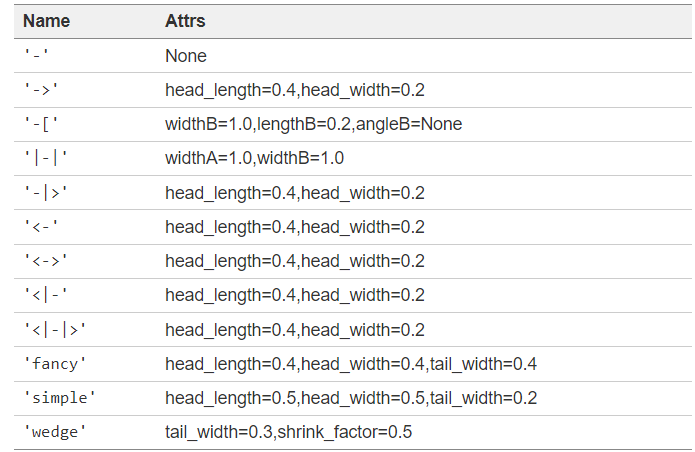
</div>

##### Arrow's curve

This is done with the attribute `connectionstyle`.


There are a bunch of options, but to simplify things, let's focused on the ones marked (in yellow) in the next image:

<div>
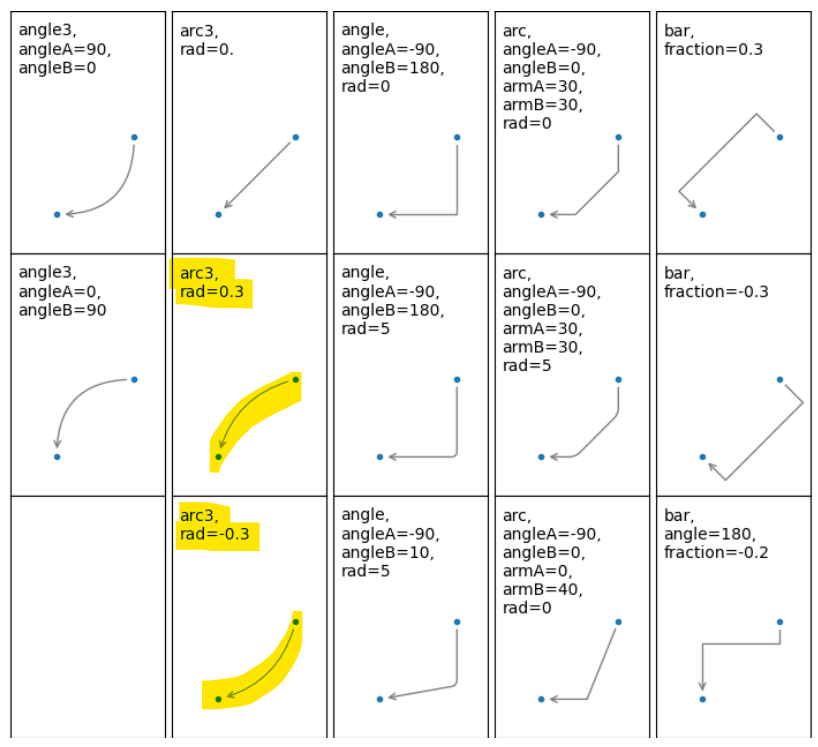
</div>

<Figure size 640x480 with 0 Axes>

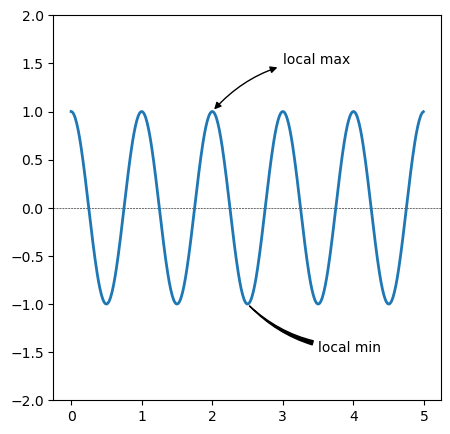

In [44]:
fig = plt.figure()
fig, ax = plt.subplots(figsize=(5, 5))

ax.axhline(y = 0, lw = 0.4, color = 'k', ls = '--')
ax.set_ylim(-2, 2)

ax.annotate('local max', xy=(2, 1), # data being annotated (x,y)
            xytext=(3, 1.5), # annotation text (x,y)
            arrowprops=dict(arrowstyle = '<|-|>',facecolor='black', 
            connectionstyle="arc3,rad=0.2"))

ax.annotate('local min', xy=(2.5, -1), # data being annotated (x,y)
            xytext=(3.5, -1.5), # annotation text (x,y)
            arrowprops=dict(arrowstyle = 'wedge',facecolor='black',
            connectionstyle="arc3,rad=-0.2"))


ax.plot(x, y, lw=2)

##### Another way to annotate
Remember the `bbox` text attribute we saw before? It can be used in the same way we've used arrow until now.

>**Note**: This way of annotation uses the `text()` function and not the `annotate()` function.

<Figure size 640x480 with 0 Axes>

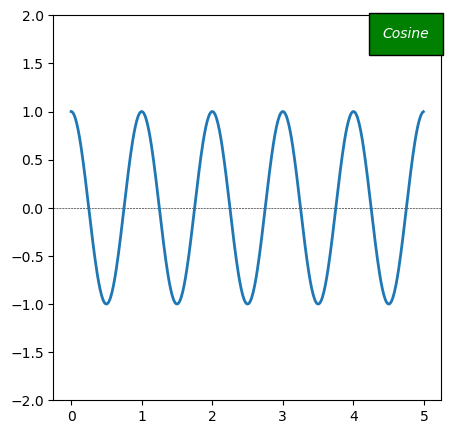

In [43]:
fig = plt.figure()
fig, ax = plt.subplots(figsize=(5, 5))

ax.axhline(y = 0, lw = 0.4, color = 'k', ls = '--')
ax.set_ylim(-2, 2)

ax.text(.97,.97, 'Cosine', style = 'oblique',
        bbox = {'facecolor':'green', 'pad':10}, color = 'w',
        transform=ax.transAxes,  verticalalignment='top', 
        horizontalalignment='right',)

        
ax.plot(x, y, lw=2)

`bbox` has the attribute **boxstyle** to change the box's layout. These are the possible options:

<div>
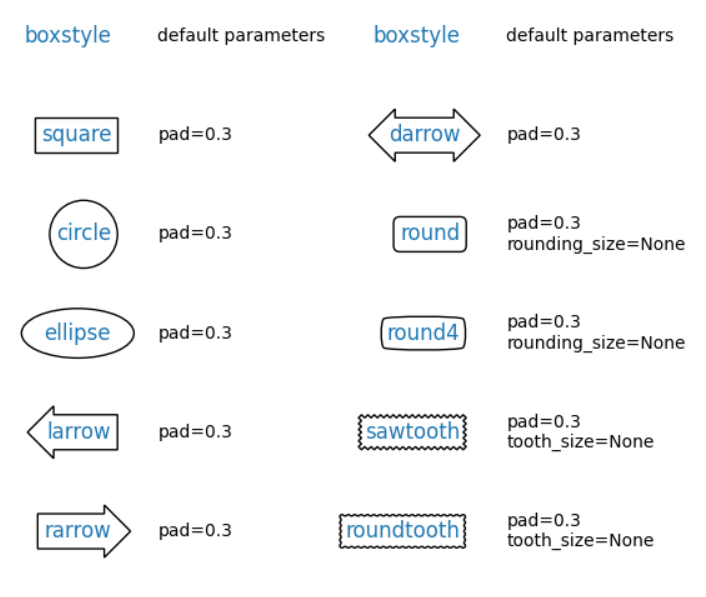
</div>

We are going to see an example with the **larrow style** to obtain the same annotation as before with the *local maximum*.

<Figure size 640x480 with 0 Axes>

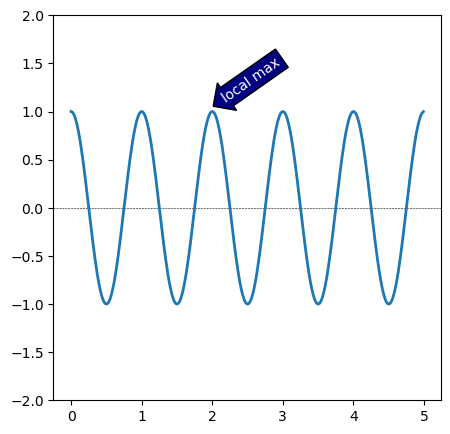

In [45]:
fig = plt.figure()
fig, ax = plt.subplots(figsize=(5, 5))

ax.axhline(y = 0, lw = 0.4, color = 'k', ls = '--')
ax.set_ylim(-2, 2)

ax.text(2.1,1.1, 'local max',  color = 'w', rotation = 35,
        bbox= {'boxstyle':'larrow', 'facecolor': 'navy'})

        
ax.plot(x, y, lw = 2)

#### Annotations among plots
You can use the attribute `Axes.transData` to establish *connections* among plots.
- It receives the coordinates along with the axis of the first plot as the **source**; and the coordenates along with the axis of the second plot as the **destiny**.

Text(0.5, 0.98, 'Annotations among plots')

<Figure size 640x480 with 0 Axes>

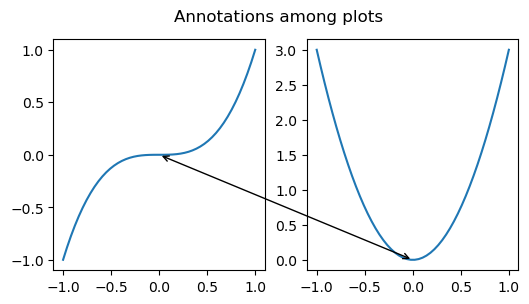

In [46]:
# We are going to establish an annotation between a graph and its derivative

x = np.linspace(-1, 1)
func1 = x**3
derivative_func1 = 3*x**2

fig = plt.figure()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
ax[0].plot(x, func1)
ax[1].plot(x, derivative_func1)
ax[1].annotate("",
             xy=(0, 0), xycoords=ax[0].transData, # coordenates and axis of the 'source'
             xytext=(0, 0), textcoords=ax[1].transData, # coordenates and axis of the 'destiny'
             arrowprops=dict(arrowstyle="<->"))
fig.suptitle('Annotations among plots')

## <a id = 'tex'> TeX equations </a>
Finally, to end this notebook, we are going to see the LaTeX equations. 

These can be written anywhere: legend, title, labels, ticks, text, etc.

The sintax is very simple: `r'LaTeX expression'`.

Let's see some examples:

>**Note**: Remember that a LaTeX equation *always* starts and ends with a $.

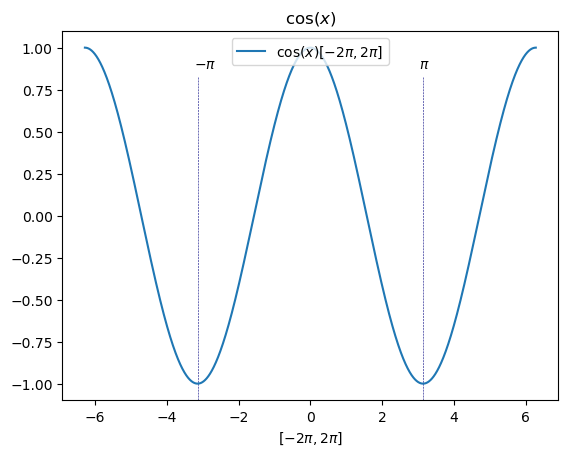

In [47]:
x = np.linspace(-2*np.pi, 2*np.pi, 10000)
y = np.cos(x)

plt.xlabel(r'$[-2\pi, 2\pi]$')
plt.title(r'$\cos(x)$')

# vertical lines
plt.axvline(x = -np.pi, ymax = 7/8, color = 'navy', ls = '--', lw='0.4')
plt.axvline(x = np.pi, ymax = 7/8, color = 'navy', ls = '--', lw='0.4')

#text + LaTeX equations
plt.text(-np.pi-0.1, 0.88, r'$-\pi$')
plt.text(np.pi-0.1, 0.88, r'$\pi$')

plt.plot(x, y, label = r'$\cos(x) [-2\pi, 2\pi]$')
plt.legend(loc = 'upper center')
plt.show()

A more *real* example would be the one we used before in [horizontal & vertical lines](#h&v)

<Figure size 640x480 with 0 Axes>

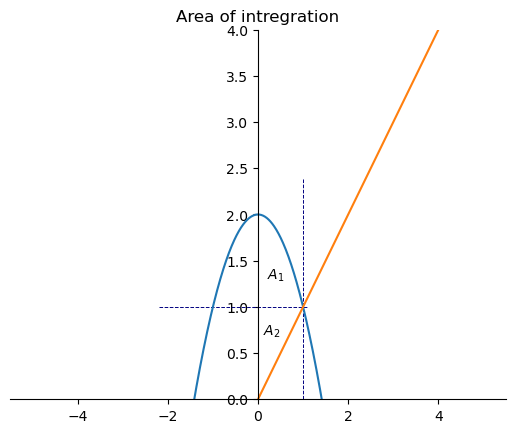

In [48]:
x = np.linspace(-5, 5, 1000)
func1 = -x**2 + 2
func2 = x

fig = plt.figure()
fig, ax = plt.subplots()

ax.set_title('Area of intregration')
ax.spines[['bottom', 'left']].set_position('zero')
ax.spines[['top', 'right']].set_visible(False)
ax.set_ylim(0,4)
ax.axhline(y = 1, xmin= 0.3, xmax = 0.6,  color = 'navy', 
           lw = 0.7, ls = '--' ) #written the same way as in .plt()
ax.axvline(x = 1, ymax = 0.6,  color = 'navy', lw = 0.7, ls = '--' )
ax.text(0.2, 1.3, r'$A_1$', style = 'oblique') # <--------------------------------------
ax.text(0.1, 0.7, r'$A_2$', style = 'oblique') # <--------------------------------------
ax.plot(x,func1)
ax.plot(x, func2)

plt.show()

## <a id = 'color'> Color </a>
I am not going to dive deep into this topic because it's too long, but you have color palettes that you can use in your graph.
Choosing the right one is extremly important when it comes to showing your data in a clean and simple way.

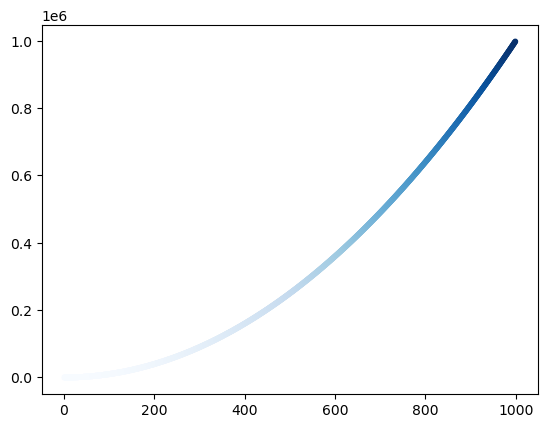

In [34]:
fig, ax = plt.subplots()
ax.scatter(x_values,  y_values, c = y_values, cmap = plt.cm.Blues, s = 10)

x_values = range(1, 1000)
y_values = [x**2 for x in x_values]

plt.show()

<p style="text-align:center"><b>This notebook has been done by:</b></p>
<p style="text-align:center"><i>Javier Coque</i></p>
<p style="text-align:center"><i>University of U-tad: Double Degree in software engineering and computational mathematics</i></p>

LinkedIn: <a href="https://www.linkedin.com/in/javier-coque-92b934278/">Javier Coque</a>